##Задание 1. Практическая часть. Производные, интегралы в SymPy

###Пример оформления решения

Подключаем пакеты Python

In [ ]:
from sympy import * # пакет символьных вычислений
import numpy as np # пакет для работы с многомерными массивами

Создаем символы (переменные)

In [ ]:
x, y, t, C = symbols("x y t C")

Теперь можно создавать выражения с этими переменными

In [ ]:
f = x ** 2 - sin(x) / 2 + sqrt(x - 1)
f

x**2 + sqrt(x - 1) - sin(x)/2

Дифференцирование выражений выполняется командой diff

In [ ]:
diff(f, x)

2*x - cos(x)/2 + 1/(2*sqrt(x - 1))

Интегрирование - командой integrate

In [ ]:
integrate(f, x)

x**3/3 + 2*(x - 1)**(3/2)/3 + cos(x)/2

Определенный интеграл вычисляется той же командой, но с указанием во втором аргументе пределов интегрирования

In [ ]:
integrate(f, (x, 2, 5))

cos(5)/2 - cos(2)/2 + 131/3

Решим простейшее дифференциальное уравнение $xy'+2=x^2$ с начальным условием $y(1)=2$

In [ ]:
# создаем производную
dydx = Derivative(y, x) # dydx - имя переменной, обозначающей производную
dydx

Derivative(y, x)

In [ ]:
# создаем уравнение, функция Eq(a, b) обозначает равенство a = b
eq = Eq(x * dydx + 2, x ** 2)
eq

Eq(x*Derivative(y, x) + 2, x**2)

In [ ]:
# находим производную с помощью команды solve - решение алгебраических уравнений, результат - список решений, выбор нужного решения через индексирование
sol = solve(eq, dydx)[0]
sol

x - 2/x

In [ ]:
# интегрируем найденную производную и вручную добавляем константу интегрирования - получаем общее решение заданного ДУ
dsol = integrate(sol, x) + C
dsol

C + x**2/2 - 2*log(x)

In [ ]:
# Находим константу интегрирования, решая уравнение y(x0, C) = y0, где x0, y0 - начальное условие
x0, y0 = 1, 2 # см. условие задачи выше
X = dsol.subs(x, x0) # подставили x0 вместо x в решение dsol
eq = Eq(y0, X) # приравняли к y0
C0 = solve(eq)[0] # нашли С
dsol0 = dsol.subs(C, C0) # подставили C в общее решение
dsol0 # решение начальной задачи

x**2/2 - 2*log(x) + 3/2

Построим графики с интегральными кривыми

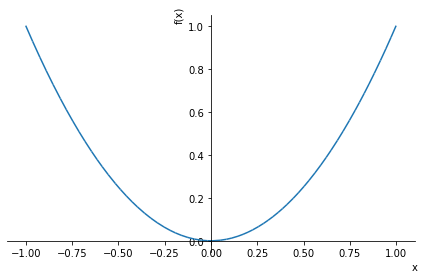

In [ ]:
# график функции f(x) в интервале от a до b строится командой plot( f(x), (x,a,b) )
p = plot(x ** 2, (x, -1, 1))

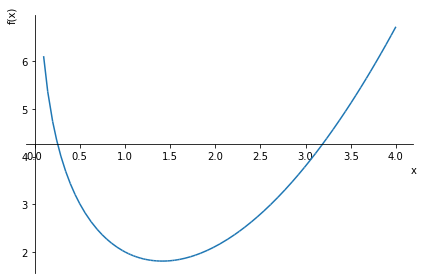

In [ ]:
# график решения dsol0 начальной задачи
p = plot(dsol0, (x, 0.1, 4))

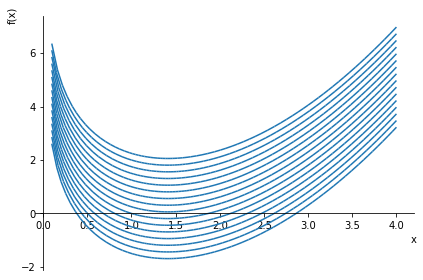

In [ ]:
# график семейства интегральных кривых общего решения dsol
p = plot(show=False) # пустой график
for c in np.arange(-2, 2, 0.25): # цикл по значениям константы C
  p1 = plot(dsol.subs(C, c), (x, 0.1, 4), show=False) # график новой кривой
  p.extend(p1) # добавляем новый график к общему графику
p.show() # показываем общий график

### Задание
По описанной выше схеме для Вашего варианта вычислите производную из пункта (а) аналитической части (задание 1.1)

Для Вашего варианта найдите общее решение ДУ из пункта б аналитической части (задание 1.1)

Для Вашего варианта найдите решение начальной задачи из пункта б аналитической части (задание 1.1)

## Задание 2. Свободное падение тел

Создаем переменные $x$, $y$, $t$, $w_0$, $\alpha$ и $g$

Создаем начальные условия $x_0=0$, $y_0=0$, $u_0=w_0\cos{\alpha}$, $v_0=w_0\sin{\alpha}$

In [ ]:
x0 =
y0 =
u0 =
v0 =

Создаем правые части простейших дифференциальных уравнений для горизонтальной и вертикальной скоростей: $$du/dt=0, dv/dt=-g$$

In [ ]:
U = 0
V = -g

Интегрируем эти правые части и находим сами скорости с учетом начальных условий: $$u=\int U dt + u_0, v = \int V dt + v_0$$

In [ ]:
u =
v =
u, v # выводим на экран найденные интегралы

Получили правые части простейших ДУ для $x(t)$ и $y(t)$: $dx/dt=u$, $dy/dt=v$. Интегрируем эти выражения и находим $x(t)$ и $y(t)$ с учетом начальных условий: $$x=\int u dt + x_0, y=\int v dt + y0$$

In [ ]:
xsol =
ysol =
xsol, ysol # выводим на экран найденные интегралы

Вычисляем время $t_1$ от начала полета до падения, решая уравнение $y(t)=0$. Выражение $y(t)$ хранится в переменной ysol. Данное уравнение имеет два решения, нужно записать в переменную t1 ненулевое решение.

In [ ]:
t1 =
t1 # вывод на экран

Находим $x$-координату точки падения, подставляя найденное выше значение $t_1$ в выражение $x(t)$ (переменная xsol):

In [ ]:
x1 =
x1 # вывод на экран

Выражаем $y$ через $x$, исключая из системы $x(t)=0$, $y(t)=0$ время $t$:

In [ ]:
T = solve(Eq(xsol, x), t)[0] # выразили t через x
Y = ysol.subs(t, T) # подставили T в y(t) вместо t
Y # вывод формулы на экран

Строим траекторию движения тела от точки броска $x=0$ до точки падения $x=x_1$ для ускорения свободного падения $g=9.8$, начальной скорости $w_0=1$, угла $\alpha=\pi/4$:

In [ ]:
ya = Y.subs(g, 9.8).subs(w0, 1).subs(alpha, np.pi/4) # уравнение траектории
x1a = x1.subs(g, 9.8).subs(w0, 1).subs(alpha, np.pi/4) # точка падения
p = plot(ya, (x, 0, x1a))

Постройте на том же графике аналогичную траекторию полета тела на заданном космическом теле (ускорение свободного падения для этого тела найдите в Интернете):
1. Луна
2. Марс

In [ ]:
p1 =
p.extend(p1)
p.show()

## Задание 3. Свободное падение тел, семейство траекторий

Постройте семейство траекторий для разных начальных углов $\alpha\in[\pi/20, \pi/2]$ с шагом $\pi/20$ для вашего космического тела:

Постройте семейство траекторий для разных начальных скоростей $w_0\in[1,10]$ с шагом $1$ для вашего космического тела

## Задание 4. Свободное падение балласта

С воздушного шара, который спускается вертикально вниз со скоростью 10 м/с, на высоте 1000 метров сбрасывают алюминиевый балласт массой 10 кг. После сброса на балласт действует сила сопротивления воздуха, пропорциональная его скорости, с коэффициентом сопротивления $k = 5.0$ кг/c. Через 40 секунд на высоте 500 метров был сброшен второй свинцовый балласт массой в 4 раза больше алюминиевого с тем же коэффициентом сопротивления. Какой из балластов достигнет поверхности Земли раньше и с какой разницей по времени, если скорость спуска воздушного шара на высоте 500 метров при сбросе второго балласта составила 1 м/с. Ускорение свободного падения считать равным 10 м/$с^2$. Приведите графики изменения скорости с течением времени для каждого балласта.